In [21]:
import numpy as np
import matplotlib.image as mpimg  
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2  
import copy
import os
import glob

import pandas as pd
%matplotlib inline

In [22]:
IMG_ROOT = '../Dataset/kitti/training/image_2/'
print(f"Number of  images: {len(os.listdir(IMG_ROOT) )}")

Number of  images: 7481


# 1- Corner Detection

## Harris Corner Detection

### Import resources and display image

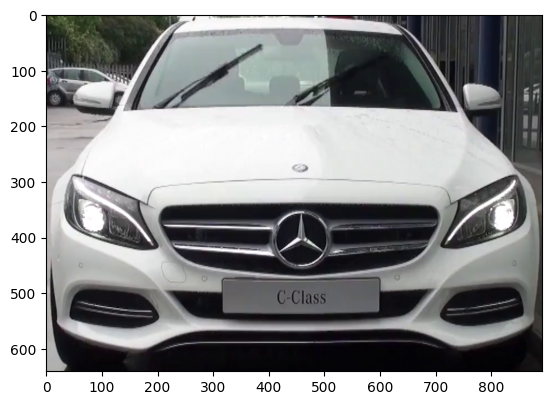

In [23]:
image = cv2.imread('images/car.png')
image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy , cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)
plt.show()

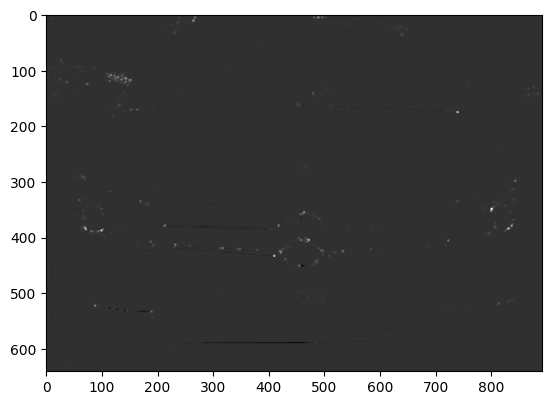

In [24]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')

### Extract and display strong corners 

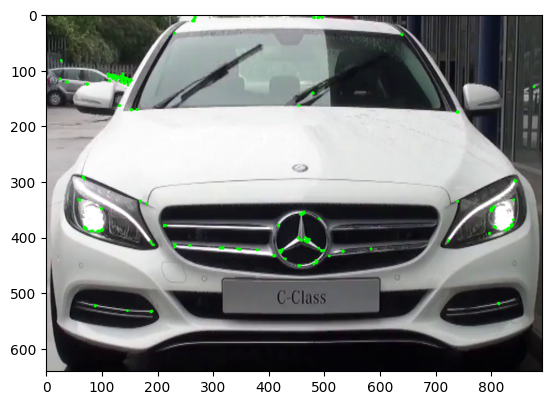

In [25]:
# Define a threshold for extracting strong corners 
# This value vary depending on the image and how many corners you want to detect
th = 0.1 * dst.max()

# create an image copy to draw corners on 
corner_image =np.copy(image_copy)

# iterate through all the corners and draw them on the image (if they pass the threshold )
green = (0 , 255 , 0)
for j in range(0 , dst.shape[0]):
    for i in range(0 , dst.shape[1]):
        if dst[j,i] > th :
            # image, center pt, radius, color, thickness
            cv2.circle(corner_image , (i,j) , 1 ,green , 1 )


# disply image 
plt.imshow(corner_image)
plt.show()

# 2_ Image pyramids

Take a look at how downsampling with image pyramids works.

First, we'll read in an image then construct and display a few layers of an image pyramid.

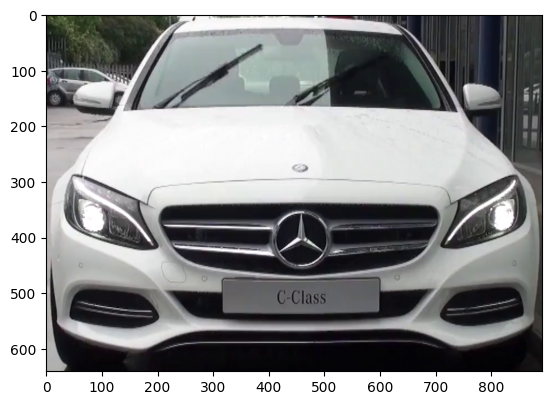

In [26]:
# Read in the image
image = cv2.imread('images/car.png')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

(0.0, 641.0)

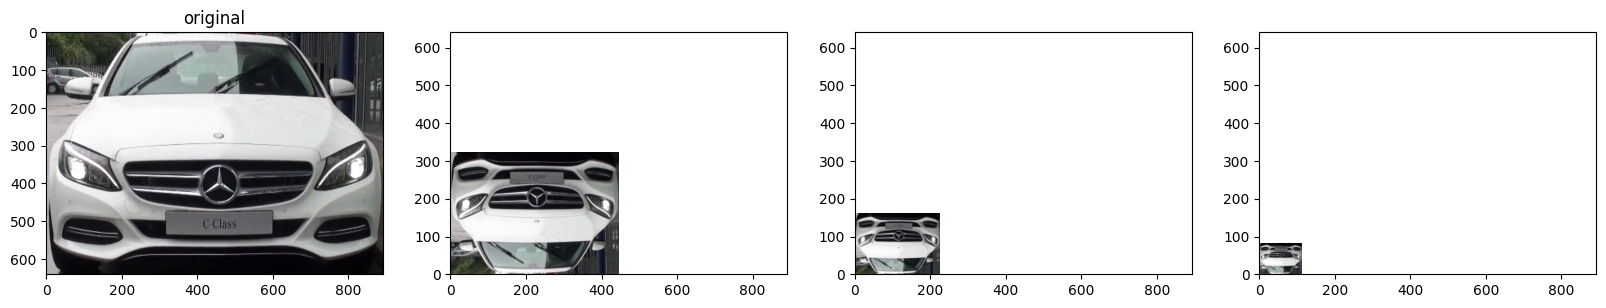

In [27]:
level_1 = cv2.pyrDown(image)
level_2 = cv2.pyrDown(level_1)
level_3 = cv2.pyrDown(level_2)

# Display the images
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title('original')
ax1.imshow(image)

ax2.imshow(level_1)
ax2.set_xlim([0, image.shape[1]])
ax2.set_ylim([0, image.shape[0]])

ax3.imshow(level_2)
ax3.set_xlim([0, image.shape[1]])
ax3.set_ylim([0, image.shape[0]])

ax4.imshow(level_3)
ax4.set_xlim([0, image.shape[1]])
ax4.set_ylim([0, image.shape[0]])


# 3_ Feature Extraction
The purpose of this section is to implement a function to extract features from an image. A feature is a point of interest in an image defined by its image pixel coordinates. A descriptor is an n-dimensional vector that summarizes the image information around the detected feature. The following figure illustrates these properties.

<br>
<figure>
  <img src = "images/feature-slide.png" width = "100%" style = "border: thin silver solid; padding: 0px">
      <figcaption style = "text-align:center; font-style:italic">Feature Descriptors.</figcaption>
</figure> 
<br>


### Here is a  common feature detectors:

* Scale-Invariant Feature Transform (SIFT)
* Oriented FAST and Rotated BRIEF (ORB)

In [28]:
def extract_features(image ,nf=1500,mode='ORB'):
    if mode =='ORB' :
        model= cv2.ORB_create(nfeatures=nf)
    if mode == 'SIFT' :
        model = cv2.SIFT_create(nfeatures=nf)
        
    # Find the keypoints and descriptors 
    kp, des = model.detectAndCompute(image, None)
    
    return kp, des

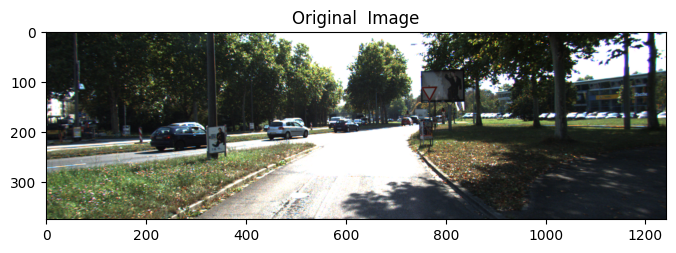

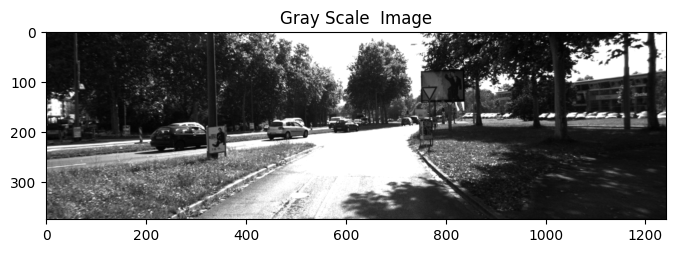

In [39]:
# Load the image

image1 = cv2.imread('images/000131.png')
image2 = cv2.imread('images/000085.png')

# convert the image to RGB 
image1 = cv2.cvtColor(image1 , cv2.COLOR_BGR2RGB ) 
image2 =cv2.cvtColor(image2 , cv2.COLOR_BGR2RGB ) 
# convert the image to Gray
gray1 = cv2.cvtColor(image1 , cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(image2 , cv2.COLOR_RGB2GRAY)
# Display the image
plt.figure(figsize=(8, 6), dpi=100)
plt.title('Original  Image')
plt.imshow(image)
plt.show()

plt.figure(figsize=(8, 6), dpi=100)
plt.title('Gray Scale  Image')
plt.imshow(gray, cmap = 'gray')
plt.show()

## feature detectors with ORB

In [44]:
kp1, des1 = extract_features(gray1 , nf=1000,mode='ORB' )
kp2, des2 = extract_features(gray2 , nf=1000,mode='ORB' )
print(f"Number of features in image1 {len(kp1)}\n" )
print(f"Coordinates of the first keypoint in image1 {str(kp1[0].pt)}")
print(f"\nNumber of features in image2 {len(kp2)}\n" )
print(f"Coordinates of the first keypoint in image2 {str(kp2[0].pt)}")

Number of features in image1 1000

Coordinates of the first keypoint in image1 (771.0, 53.0)

Number of features in image2 1000

Coordinates of the first keypoint in image2 (781.0, 265.0)


## feature detectors with SIFT

In [45]:
kp1, des1 = extract_features(gray1 , nf=1000,mode='SIFT' )
kp2, des2 = extract_features(gray2 , nf=1000,mode='SIFT' )
print(f"Number of features in image1 {len(kp1)}\n" )
print(f"Coordinates of the first keypoint in image1 {str(kp1[0].pt)}")
print(f"\nNumber of features in image2 {len(kp2)}\n" )
print(f"Coordinates of the first keypoint in image2 {str(kp2[0].pt)}")

Number of features in image1 1000

Coordinates of the first keypoint in image1 (141.73565673828125, 148.74774169921875)

Number of features in image2 1000

Coordinates of the first keypoint in image2 (998.6734008789062, 206.0790252685547)


## visualize features

In [46]:
def visualize_features(image, kp):
    display = cv2.drawKeypoints(image, kp, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.figure(figsize=(8, 6), dpi=100)
    plt.imshow(display)
    plt.show()


def image_with_features(image, kp):
    display = cv2.drawKeypoints(image, kp, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return display

## feature detectors and visualize with SIFT

Number of features 1000

Coordinates of the first keypoint (141.73565673828125, 148.74774169921875)




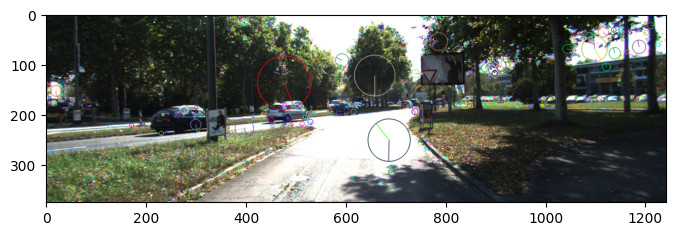

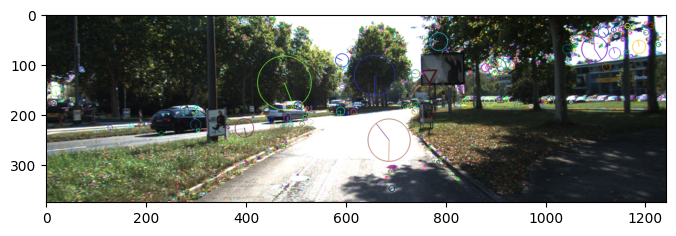

In [47]:
kp, des = extract_features(gray1,nf = 1000,mode='SIFT')
print(f"Number of features {len(kp)}\n" )

print(f"Coordinates of the first keypoint {str(kp[0].pt)}\n\n" )
visualize_features(image, kp)
im = image_with_features(image, kp)
plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(im)
plt.show()

## feature detectors and visualize with ORB

Number of features 1000

Coordinates of the first keypoint (771.0, 53.0)




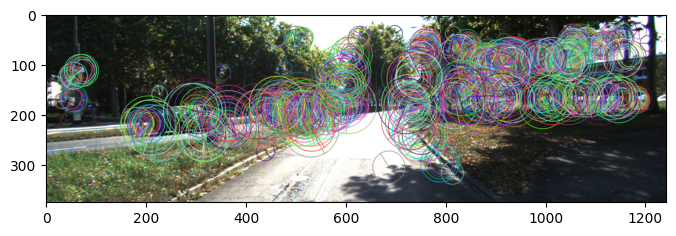

In [48]:
kp, des = extract_features(gray1,nf = 1000 ,mode='ORB')
print(f"Number of features {len(kp)}\n" )

print(f"Coordinates of the first keypoint {str(kp[0].pt)}\n\n" )
visualize_features(image, kp)


## 2 - Feature Matching

The purpose of this section is to implement a function to match features in a sequence of images. Feature matching is the process of establishing correspondences between two images of the same scene.


<br>
<figure>
  <img src = "../images/matcher-slide.png" width = "100%" style = "border: thin silver solid; padding: 0px">
      <figcaption style = "text-align:center; font-style:italic">Feature Matching.</figcaption>
</figure> 
<br>


OpenCV provides two techniques to match different descriptors: Brute-Force matcher and FLANN based matcher.

The Brute-Force matcher compares one descriptor in the first image to all descriptors in the second image. The algorithm then matches the descriptor with the shortest distance to the descriptor in the first image.

FLANN stands for Fast Library for Approximate Nearest Neighbors. It contains a collection of algorithms optimized for fast neighbor search in datasets and high dimensional features.


For BF matcher, first we have to create the BFMatcher object using `cv2.BFMatcher()`. It takes two optional params. First one is normType. It specifies the distance measurement to be used. By default, it is `cv2.NORM_L2`. It is good for SIFT. For binary string based descriptors like ORB, BRIEF, `cv2.NORM_HAMMING` should be used, which used Hamming distance as measurement.

for more details  can be found [here](https://www.geeksforgeeks.org/python-opencv-flannbasedmatcher-function/)


In [49]:
def match_features(des1, des2 ):

    # Define FLANN parameters
    FLANN_INDEX_LSH = 6
    index_params = dict(algorithm = FLANN_INDEX_LSH,
                        table_number = 6,
                        key_size = 12, 
                        multi_probe_level = 1)
    search_params = dict(checks = 50)
    
    # Initiate FLANN matcher
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    
    # Find matches with FLANN
    match = flann.knnMatch( des1, des2 , k=2 )

    return match

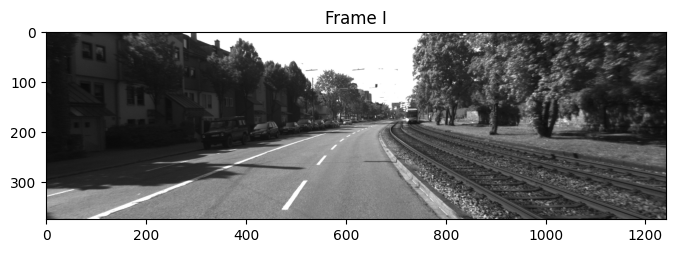

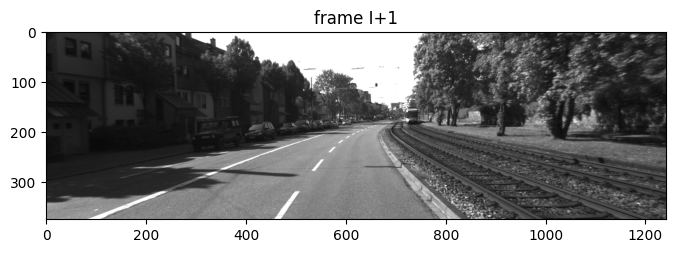

Number of features matched in frames 0 and 1: 1000


In [52]:
# Display the image


image1 = cv2.imread('images/0000000000.png')
image2 = cv2.imread('images/0000000001.png')
kp1, des1 = extract_features(image1 , nf=1000,mode='ORB' )
kp2, des2 = extract_features(image2 , nf=1000,mode='ORB' )
plt.figure(figsize=(8, 6), dpi=100)
plt.title('Frame I')
plt.imshow(image1)
plt.show()
plt.figure(figsize=(8, 6), dpi=100)
plt.title('frame I+1')
plt.imshow(image2)
plt.show()

match = match_features(des1, des2)

print("Number of features matched in frames {0} and {1}: {2}".format(i, i+1, len(match)))

### 2.2 - Matching Features filtering by thresholding the distance between the best matches.

This might be useful for improving your overall trajectory estimation results. Recall that you have an option of specifying the number best matches to be returned by the matcher.

In [53]:
def filter_matches_distance(match, dist_threshold):
    
    filtered_match = [m for m, n in match if m.distance < (dist_threshold * n.distance)]
    
    return filtered_match

### visualize matches

In [54]:
def visualize_matches(image1, kp1, image2, kp2, match):
    image_matches = cv2.drawMatches(image1,kp1,image2,kp2,match,None)
    plt.figure(figsize=(16, 16), dpi=100)
    plt.imshow(image_matches)

In [58]:
image1 = cv2.imread('images/0000000008.png')
image2 = cv2.imread('images/0000000009.png')
kp1, des1 = extract_features(image1 , nf=1000,mode='ORB' )
kp2, des2 = extract_features(image2 , nf=1000,mode='ORB' )
match = match_features(des1, des2)

dist_threshold = 0.6
filtered_match = filter_matches_distance(match, dist_threshold)

print("Number of features matched in frames {0} and {1} after filtering by distance: {2}".format(8, 9, len(filtered_match)))

Number of features matched in frames 8 and 9 after filtering by distance: 468


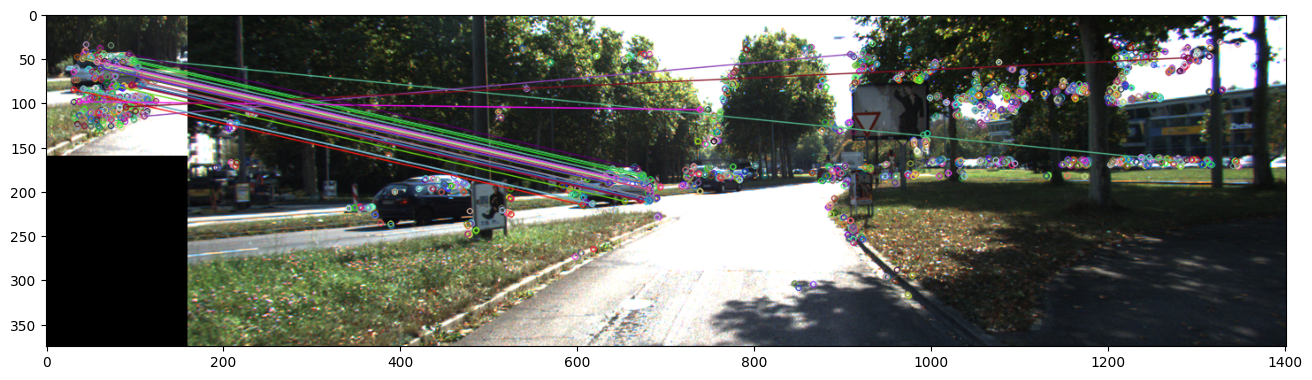

In [59]:

filtering = True

# Load the training image
image1 = cv2.imread('images/000131a.png')

# Load the query image
image2 = cv2.imread('images/000131.png')

# Convert the training image to RGB
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the query image to RGB
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)


# Convert the training image to gray scale
training_gray = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)

# Convert the query image to gray scale
query_gray = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

## feature detectors with ORB
kp1, des1 = extract_features(training_gray,mode='ORB')
kp2, des2 = extract_features(query_gray,mode='ORB')


match = match_features(des1, des2)
if filtering:
    dist_threshold = 0.7
    match = filter_matches_distance(match, dist_threshold)

image_matches = visualize_matches(image1, kp1, image2, kp2, match[:n])

## Histograms of Oriented Gradients (HOG)

As we saw with the ORB algorithm, we can use keypoints in images to do keypoint-based matching to detect objects in images. These type of algorithms work great when you want to detect objects that have a lot of consistent internal features that are not affected by the background. For example, these algorithms work well for facial detection because faces have a lot of consistent internal features that don’t get affected by the image background, such as the eyes, nose, and mouth. However, these type of algorithms don’t work so well when attempting to do more general object recognition, say for example, pedestrian detection in images. The reason is that people don’t have consistent internal features, like faces do, because the body shape and style of every person is different (see Fig. 1). This means that every person is going to have a different set of internal features, and so we need something that can more generally describe a person.

<br>
<figure>
  <img src = "images/pedestrians.jpeg" width = "50%" style = "border: thin silver solid; padding: 10px">
      <figcaption style = "text-align:left; font-style:italic">Fig. 1. - Pedestrians.</figcaption>
</figure> 
<br>

One option is to try to detect pedestrians by their contours instead.  Detecting objects in images by their contours (boundaries) is very challenging because we have to deal with the difficulties brought about by the contrast between the background and the foreground. For example, suppose you wanted to detect a pedestrian in an image that is walking in front of a white building and she is wearing a white coat and black pants (see Fig. 2). We can see in Fig. 2, that since the background of the image is mostly white, the black pants are going to have a very high contrast, but the coat, since it is white as well, is going to have very low contrast. In this case, detecting the edges of pants is going to be easy but detecting the edges of the coat is going to be very difficult. This is where **HOG** comes in. HOG stands for **Histograms of Oriented Gradients** and it was first introduced by Navneet Dalal and Bill Triggs in 2005.

<br>
<figure>
  <img src = "images/woman.jpg" width = "50%" style = "border: thin silver solid; padding: 10px">
      <figcaption style = "text-align:left; font-style:italic">Fig. 2. - High and Low Contrast.</figcaption>
</figure> 
<br>

The HOG algorithm works by creating histograms of the distribution of gradient orientations in an image and then normalizing them in a very special way. This special normalization is what makes HOG so effective at detecting the edges of objects even in cases where the contrast is very low. These normalized histograms are put together into a feature vector, known as the HOG descriptor, that can be used to train a machine learning algorithm, such as a Support Vector Machine (SVM), to detect objects in images based on their boundaries (edges). Due to its great success and reliability, HOG has become one of the most widely used algorithms in computer vison for object detection.

## you will learn:

* How the HOG algorithm works
* How to use OpenCV to create a HOG descriptor
* How to visualize the HOG descriptor.

# The HOG Algorithm

As its name suggests, the HOG algorithm, is based on creating histograms from the orientation of image gradients. The HOG algorithm is implemented in a series of steps:

1. Given the image of particular object, set a detection window (region of interest) that covers the entire object in the image (see Fig. 3).

2. Calculate the magnitude and direction of the gradient for each individual pixel in the detection window.

3. Divide the detection window into connected *cells* of pixels, with all cells being of the same size (see Fig. 3). The size of the cells is a free parameter and it is usually chosen so as to match the scale of the features that want to be detected. For example, in a 64 x 128 pixel detection window, square cells 6 to 8 pixels wide are suitable for detecting human limbs.

4. Create a Histogram for each cell, by first grouping the gradient directions of all pixels in each cell into a particular number of orientation (angular) bins; and then adding up the gradient magnitudes of the gradients in each angular bin (see Fig. 3). The number of bins in the histogram is a free parameter and it is usually set to 9 angular bins.

5. Group adjacent cells into *blocks* (see Fig. 3). The number of cells in each block is a free parameter and all blocks must be of the same size. The distance between each block (known as the stride) is a free parameter but it is usually set to half the block size, in which case you will get overlapping blocks (*see video below*).  The HOG algorithm has been shown empirically to work better with overlapping blocks.

6. Use the cells contained within each block to normalize the cell histograms in that block (see Fig. 3). If you have overlapping blocks this means that most cells will be normalized with respect to different blocks (*see video below*). Therefore, the same cell may have several different normalizations.

7. Collect all the normalized histograms from all the blocks into a single feature vector called the HOG descriptor.

8. Use the resulting HOG descriptors from many images of the same type of object to train a machine learning algorithm, such as an SVM, to detect those type of objects in images. For example, you could use the HOG descriptors from many images of pedestrians to train an SVM to detect pedestrians in images. The training is done with both positive a negative examples of the object you want detect in the image.

9. Once the SVM has been trained, a sliding window approach is used to try to detect and locate objects in images.  Detecting an object in the image entails finding the part of the image that looks similar to the HOG pattern learned by the SVM.


<br>
<figure>
  <img src = "images/HOG Diagram2.png" width = "100%" style = "border: thin silver solid; padding: 1px">
      <figcaption style = "text-align:left; font-style:italic">Fig. 3. - HOG Diagram.</figcaption>
</figure> 
<br>

<figure>
<video src = "images/HOG Animation - Medium.mp4" width="100%" controls autoplay loop> </video>
<figcaption style = "text-align:left; font-style:italic">Vid. 1. - HOG Animation.</figcaption>
</figure> 

# Why The HOG Algorithm Works

As we learned above, HOG creates histograms by adding the magnitude of the gradients in particular orientations in localized portions of the image called *cells*.  By doing this we guarantee that stronger gradients will contribute more to the magnitude of their respective angular bin, while the effects of weak and randomly oriented gradients resulting from noise are minimized. In this manner the histograms tell us the dominant gradient orientation of each cell. 

### Dealing with contrast 

Now, the magnitude of the dominant orientation can vary widely due to variations in local illumination and the contrast between the background and the foreground.

To account for the background-foreground contrast differences, the HOG algorithm tries to detect edges locally.  In order to do this, it defines groups of cells, called **blocks**, and normalizes the histograms using this local group of cells. By normalizing locally, the HOG algorithm can detect the edges in each block very reliably; this is called **block normalization**.

In addition to using block normalization, the HOG algorithm also uses overlapping blocks to increase its performance. By using overlapping blocks, each cell contributes several independent components to the final HOG descriptor, where each component corresponds to a cell being normalized with respect to a different block. This may seem redundant but, it has been shown empirically that by normalizing each cell several times with respect to different local blocks, the performance of the HOG algorithm increases dramatically. 

### Loading Images and Importing Resources
    
    The first step in building our HOG descriptor is to load the required packages into Python and to load our image. 
    
    We start by using OpenCV to load an image of a triangle tile. Since, the `cv2.imread()` function loads images as BGR we will convert our image to RGB so we can display it with the correct colors. As usual we will convert our BGR image to Gray Scale for analysis.



    

In [60]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [10.0, 7.0]

In [62]:
# Load the image 
image = cv2.imread('images/jeep2.jpeg')

# Convert the original image to RGB
original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the original image to gray scale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [63]:
# Print the shape of the original and gray scale images
print('The original image has shape: ', original_image.shape)
print('The gray scale image has shape: ', gray_image.shape)

The original image has shape:  (424, 640, 3)
The gray scale image has shape:  (424, 640)


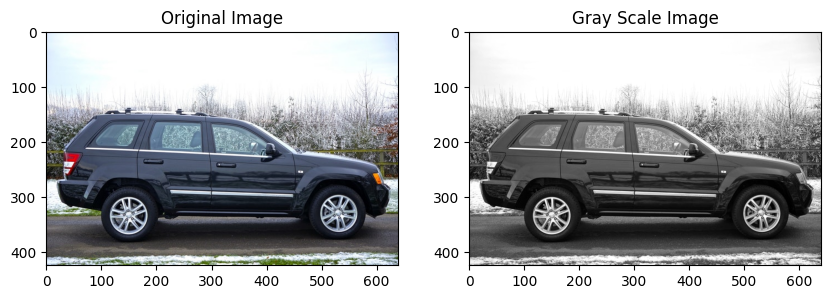

In [64]:
# Display the images
plt.subplot(121)
plt.imshow(original_image)
plt.title('Original Image')
plt.subplot(122)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Scale Image')
plt.show()

# Creating The HOG Descriptor

We will be using OpenCV’s `HOGDescriptor` class to create the HOG descriptor. The parameters of the HOG descriptor are setup using the `HOGDescriptor()` function. 


In [65]:
# Specify the parameters for our HOG descriptor
# Cell Size in pixels (width, height). Must be smaller than the size of the detection window
cell_size = (6, 6)
# Number of cells per block in each direction (x, y). 
num_cells_per_block = (2, 2)
# Block Size in pixels (width, height).
block_size = (num_cells_per_block[0] * cell_size[0],
              num_cells_per_block[1] * cell_size[1])
# Calculate the number of cells that fit in our image in the x and y directions
x_cells = gray_image.shape[1] // cell_size[0]
y_cells = gray_image.shape[0] // cell_size[1]
# Horizontal distance between blocks in units of Cell Size. 
h_stride = 1
# Vertical distance between blocks in units of Cell Size.
v_stride = 1
# Block Stride in pixels (horizantal, vertical). Must be an integer multiple of Cell Size
block_stride = (cell_size[0] * h_stride , cell_size[1] * v_stride)
# Number of gradient orientation bins
num_bins = 9     
# Specify the size of the detection window (Region of Interest) in pixels (width, height).
win_size = (x_cells * cell_size[0] , y_cells * cell_size[1])



# Print the shape of the gray scale image for reference
print('\nThe gray scale image has shape: ', gray_image.shape)
print()

# Print the parameters of our HOG descriptor
print('HOG Descriptor Parameters:\n')
print('Window Size:', win_size)
print('Cell Size:', cell_size)
print('Block Size:', block_size)
print('Block Stride:', block_stride)
print('Number of Bins:', num_bins)
print()


The gray scale image has shape:  (424, 640)

HOG Descriptor Parameters:

Window Size: (636, 420)
Cell Size: (6, 6)
Block Size: (12, 12)
Block Stride: (6, 6)
Number of Bins: 9



In [66]:
# Set the parameters of the HOG descriptor using the variables defined above
hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, num_bins)

# Compute the HOG Descriptor for the gray scale image
hog_descriptor = hog.compute(gray_image)

# Number of Elements In The HOG Descriptor

The resulting HOG Descriptor (feature vector), contains the normalized histograms from all cells from all blocks in the detection window concatenated in one long vector. 

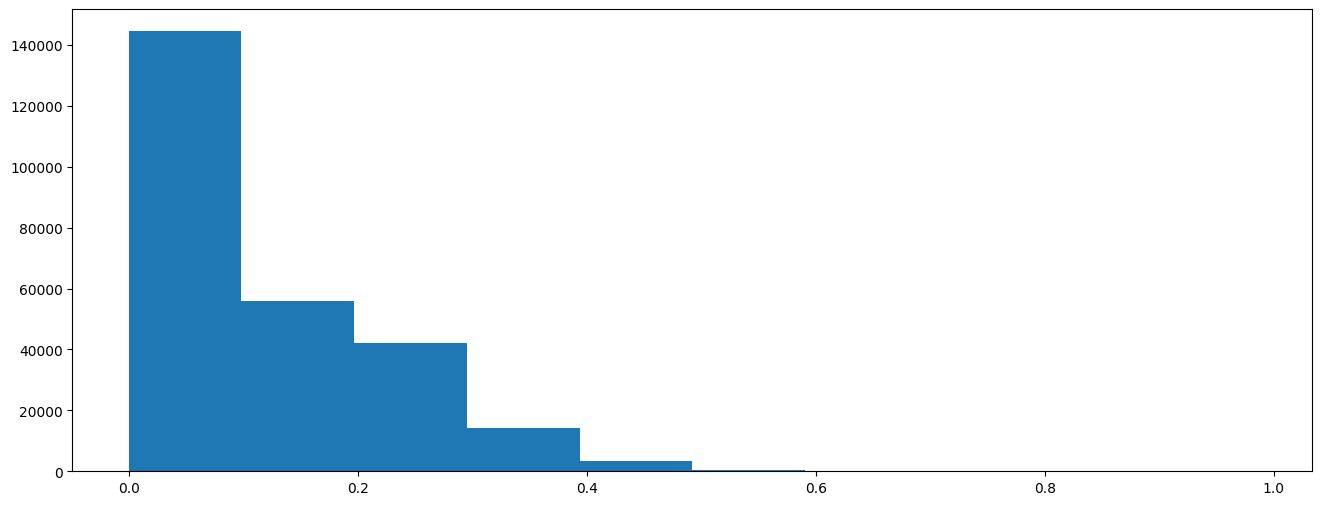

In [67]:
plt.rcParams['figure.figsize'] = [16.0, 6.0]

plt.hist(hog_descriptor)
plt.show()

In [68]:
# Calculate the total number of blocks along the width of the detection window
tot_bx = np.uint32(((x_cells - num_cells_per_block[0]) / h_stride) + 1)

# Calculate the total number of blocks along the height of the detection window
tot_by = np.uint32(((y_cells - num_cells_per_block[1]) / v_stride) + 1)

# Calculate the total number of elements in the feature vector
tot_els = (tot_bx) * (tot_by) * num_cells_per_block[0] * num_cells_per_block[1] * num_bins

# Print the total number of elements the HOG feature vector should have
print('\nThe total number of elements in the HOG Feature Vector should be: ',
      tot_bx, 'x',
      tot_by, 'x',
      num_cells_per_block[0], 'x',
      num_cells_per_block[1], 'x',
      num_bins, '=',
      tot_els)

# Print the shape of the HOG Descriptor to see that it matches the above
print('\nThe HOG Descriptor has shape:', hog_descriptor.shape)
print()


The total number of elements in the HOG Feature Vector should be:  105 x 69 x 2 x 2 x 9 = 260820

The HOG Descriptor has shape: (260820,)



# Visualizing The HOG Descriptor

In [69]:
hog_descriptor_reshaped = hog_descriptor.reshape(tot_bx,
                                                 tot_by,
                                                 num_cells_per_block[0],
                                                 num_cells_per_block[1],
                                                 num_bins).transpose((1, 0, 2, 3, 4))
# Print the shape of the feature vector for reference
print('The feature vector has shape:', hog_descriptor.shape)

# Print the reshaped feature vector
print('The reshaped feature vector has shape:', hog_descriptor_reshaped.shape)

The feature vector has shape: (260820,)
The reshaped feature vector has shape: (69, 105, 2, 2, 9)


In [70]:
# Create an array that will hold the average gradients for each cell
ave_grad = np.zeros((y_cells, x_cells, num_bins))

# Print the shape of the ave_grad array for reference
print('The average gradient array has shape: ', ave_grad.shape) 

The average gradient array has shape:  (70, 106, 9)


In [71]:
# Create an array that will count the number of histograms per cell
hist_counter = np.zeros((y_cells, x_cells, 1))
print('count the number of histograms per cell array  has shape: ', hist_counter.shape) 

count the number of histograms per cell array  has shape:  (70, 106, 1)


In [72]:
# Add up all the histograms for each cell and count the number of histograms per cell
for i in range(num_cells_per_block[0]):
    for j in range(num_cells_per_block[1]):
        ave_grad[i:tot_by+i , j:tot_bx+j] += hog_descriptor_reshaped[:, :, i, j, :]
        hist_counter[i:tot_by+i , j:tot_bx+j] +=1
        
# Calculate the average gradient for each cell
ave_grad /= hist_counter

print(ave_grad.shape)

(70, 106, 9)


In [73]:
# Calculate the total number of vectors we have in all the cells.
len_vecs = ave_grad.shape[0] * ave_grad.shape[1] * ave_grad.shape[2]

# Create an array that has num_bins equally spaced between 0 and 180 degress in radians.
deg = np.linspace(0, np.pi, num_bins, endpoint = False)

In [74]:
U = np.zeros((len_vecs))
V = np.zeros((len_vecs))
X = np.zeros((len_vecs))
Y = np.zeros((len_vecs))

In [75]:
# Set the counter to zero
counter = 0

for i in range(ave_grad.shape[0]):
    for j in range(ave_grad.shape[1]):
        for k in range(ave_grad.shape[2]):
            U[counter] =ave_grad[i,j,k] * np.cos(deg[k])
            V[counter] =ave_grad[i,j,k] * np.sin(deg[k])
            X[counter] = (cell_size[0]/2) + (cell_size[0] * i)
            Y[counter] = (cell_size[1]/2 ) + (cell_size[1] * j)
            counter += 1 


In [76]:
# Create the bins in degress to plot our histogram. 
angle_axis = np.linspace(0, 180, num_bins, endpoint = False)
angle_axis += ((angle_axis[1] - angle_axis[0]) / 2)

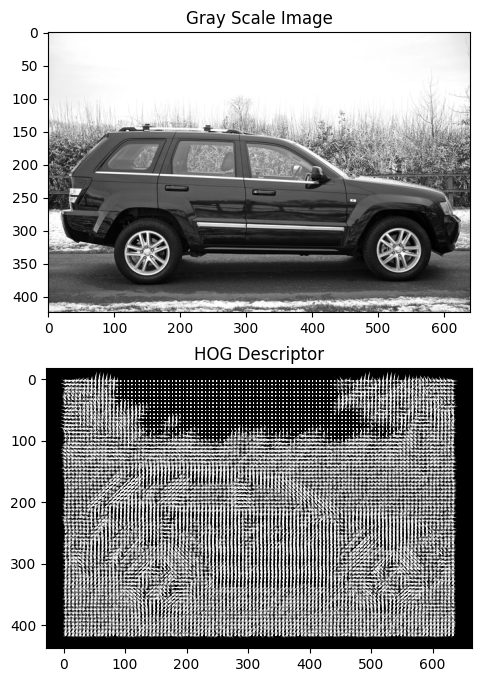

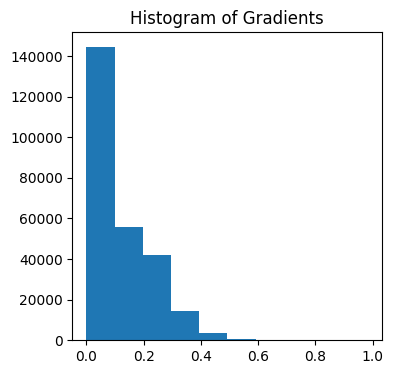

In [77]:
plt.rcParams['figure.figsize'] = [16.0, 8.0]

# Create a figure with 4 subplots arranged in 2 x 2
fig , (a,b) = plt.subplots(2 ,1)
# set the title of each subplot 
a.set(title = 'Gray Scale Image')
b.set(title = 'HOG Descriptor')


# Plot the gray scale image
a.imshow(gray_image, cmap = 'gray')
a.set_aspect(aspect = 1)

# Plot the feature vector (HOG Descriptor)
b.quiver(Y, X, U, V, color = 'white', headwidth = 0, headlength = 0, scale_units = 'inches', scale = 5)
b.invert_yaxis()
b.set_aspect(aspect = 1)
b.set_facecolor('black')
plt.show()

# display Histogram 
plt.rcParams['figure.figsize'] = [4.0, 4.0]
plt.title('Histogram of Gradients')
plt.hist(hog_descriptor )
plt.show()



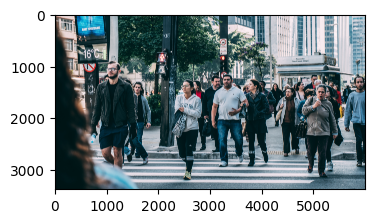

In [78]:
image = cv2.imread('../images/pedestrians.jpeg')
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

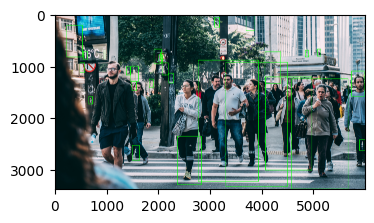

In [79]:
# create a HOGDescriptor object 
hog = cv2.HOGDescriptor()
# Initialize the People Detector 
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# winStride : step size in xand y direction of the slinding window 
# padding no . of pixels in x and y direction for padding of sliding window  
(boundingboex , weights ) = hog.detectMultiScale(image , winStride=(4,4) ,
                                               padding=(8,8) , scale=1.05)

# Draw boubnding boxes on image 
for (x ,y ,w ,h ) in boundingboex :
    cv2.rectangle(image , (x,y) ,
                  (x+w , y+h ) , green , 8 )
plt.imshow(image)
plt.show()